In [11]:
import psycopg2
import pandas.io.sql as sqlio

In [27]:
conn = psycopg2.connect(
    dbname='dbname',
    user='dbuser',
    password='dbpwd',
    host='localhost',
    port='15432'
)
cursor = conn.cursor()

In [35]:
df = sqlio.read_sql_query('SELECT * FROM hashtags_relation', conn)

In [36]:
df = df.query("distance > 5");

In [37]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163902 entries, 0 to 163901
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   hashtag_id_1  163902 non-null  float64
 1   hashtag_id_2  163902 non-null  float64
 2   distance      163902 non-null  float64
dtypes: float64(3)
memory usage: 5.0 MB


None

In [38]:
display(df.head())

,hashtag_id_1,hashtag_id_2,distance
0,4257.0,4280.0,3093.0
1,4280.0,4257.0,3093.0
2,4244.0,4257.0,3090.0
3,4257.0,4244.0,3090.0
4,4257.0,4254.0,2979.0


<AxesSubplot:>

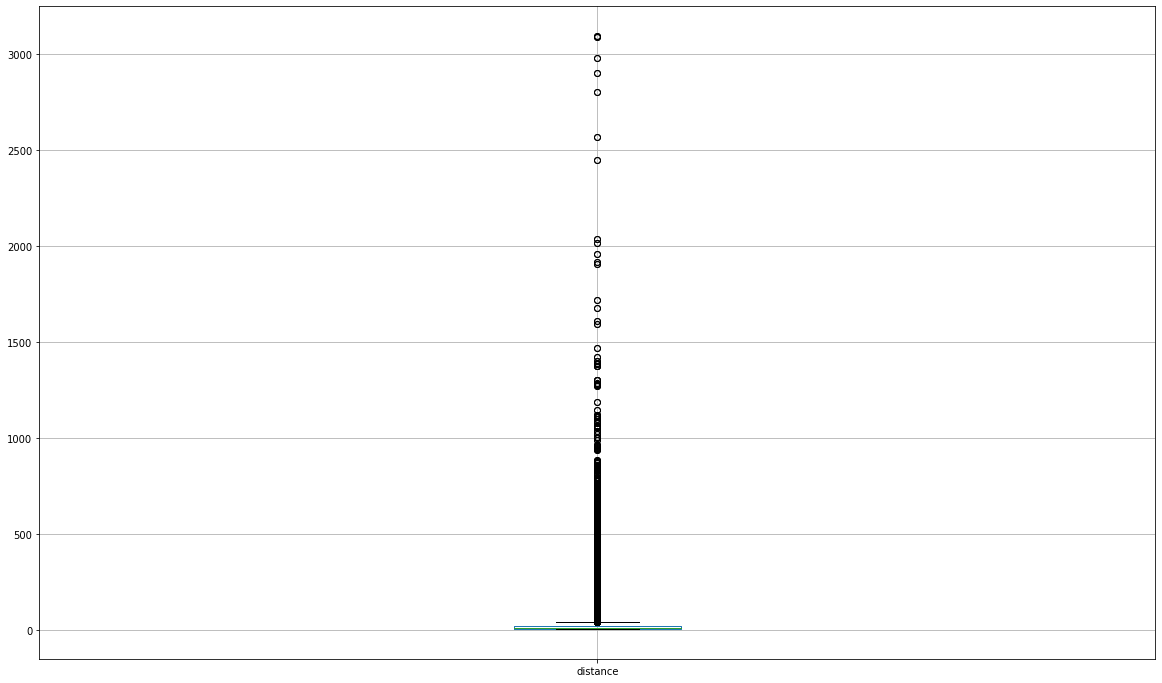

In [39]:
df.boxplot(column=['distance'], figsize=(20, 12))

In [40]:
hashtag_df = df.query("hashtag_id_1 == 4257");

In [41]:
print(hashtag_df)

        hashtag_id_1  hashtag_id_2  distance
0             4257.0        4280.0    3093.0
3             4257.0        4244.0    3090.0
4             4257.0        4254.0    2979.0
7             4257.0        4267.0    2899.0
8             4257.0        4256.0    2801.0
...              ...           ...       ...
147638        4257.0       21912.0       6.0
147640        4257.0       20808.0       6.0
147642        4257.0       21340.0       6.0
147644        4257.0        7700.0       6.0
147645        4257.0        4366.0       6.0

[3273 rows x 3 columns]


<AxesSubplot:>

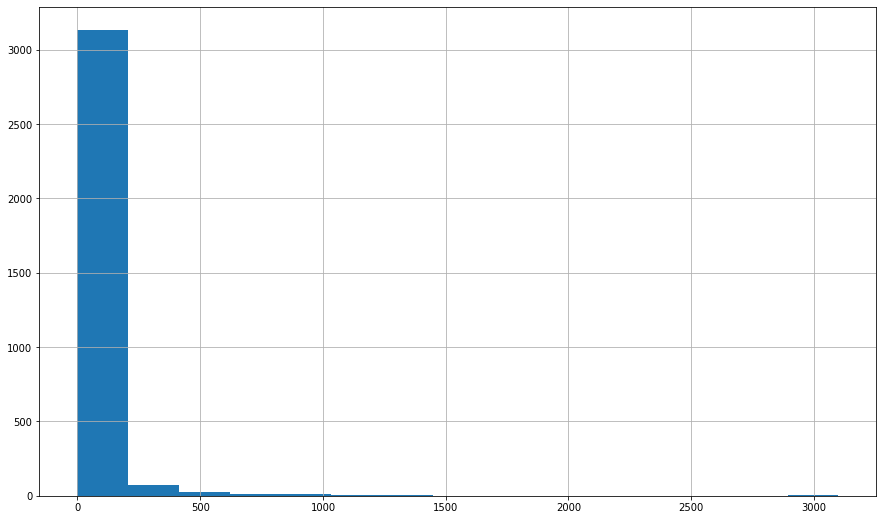

In [45]:
hashtag_df['distance'].hist(bins=15, range=(0,3100), figsize=(15, 9))

In [15]:
cursor.close()
conn.close()